<a href="https://colab.research.google.com/github/AndrielHenrique/Analise-de-Dados/blob/main/base02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Base 02: Sono e Estilo de Vida

Repositório bases de dados: https://drive.google.com/drive/folders/1fiBqX4Smv6GX2BFviHNFRM0eSwDi7ydf


### Contexto Empresarial:

Base fictícia composta por dados sobre hábitos de sono, saúde e estilo de vida de 400 indivíduos. Pode ser
usada para explorar a relação entre qualidade de vida e distúrbios do sono.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/Trabalho1"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path + '/02_sono_estilo_vida.csv', sep=',')

# Análise dos Dados

In [ ]:
# mostrar as 10 primeiras entradas
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [ ]:
df.shape

(374, 13)

In [ ]:
# Descrição estatística dos dados
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [ ]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 374 entradas (registros) e 13 atributos (variáveis).

Os tipos dos atributos são do tipo:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


# Qual a porcentagem de valores ausentes no dataset?

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Sleep Disorder,58.55615
Gender,0.00000
Age,0.00000
Occupation,0.00000
Person ID,0.00000
Sleep Duration,0.00000
Quality of Sleep,0.00000
Stress Level,0.00000
Physical Activity Level,0.00000
BMI Category,0.00000


 A porcentagem de "Sleep Disorder" representa que 58,56% da população não tem nenhum disturbio de sono.

# Qual o tipo de distribuição das variáveis?

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
print("\nValores únicos em colunas:")
for col in df.select_dtypes(include='object').columns:
    print(f"- {col}: {df[col].unique()}")


Valores únicos em colunas:
- Gender: ['Male' 'Female']
- Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
- BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
- Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
- Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


In [ ]:
print("\nDistribuição de Variáveis Categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nContagem de valores para '{col}':")
    print(df[col].value_counts())
    print(f"\nProporção de valores para '{col}':")
    print(df[col].value_counts(normalize=True) * 100)


Distribuição de Variáveis Categóricas:

Contagem de valores para 'Gender':
Gender
Male      189
Female    185
Name: count, dtype: int64

Proporção de valores para 'Gender':
Gender
Male      50.534759
Female    49.465241
Name: proportion, dtype: float64

Contagem de valores para 'Occupation':
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Proporção de valores para 'Occupation':
Occupation
Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Scientist                1.069519
Software Engineer        1.069519
Sales Represen

In [ ]:
numerical_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps'
]

In [ ]:
def detectar_outliers_iqr(dataframe, coluna):
    Q1 = dataframe[coluna].quantile(0.25)
    Q3 = dataframe[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[coluna] < limite_inferior) | (dataframe[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

print("\nDetecção de Outliers (IQR):")
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detectar_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers detectados na coluna '{col}': {len(outliers)}x.")
    else:
        print(f"Nenhum outlier significativo detectado na coluna '{col}'.")


Detecção de Outliers (IQR):
Nenhum outlier significativo detectado na coluna 'Age'.
Nenhum outlier significativo detectado na coluna 'Sleep Duration'.
Nenhum outlier significativo detectado na coluna 'Quality of Sleep'.
Nenhum outlier significativo detectado na coluna 'Physical Activity Level'.
Nenhum outlier significativo detectado na coluna 'Stress Level'.
Outliers detectados na coluna 'Heart Rate': 15x.
Nenhum outlier significativo detectado na coluna 'Daily Steps'.


#Histograma

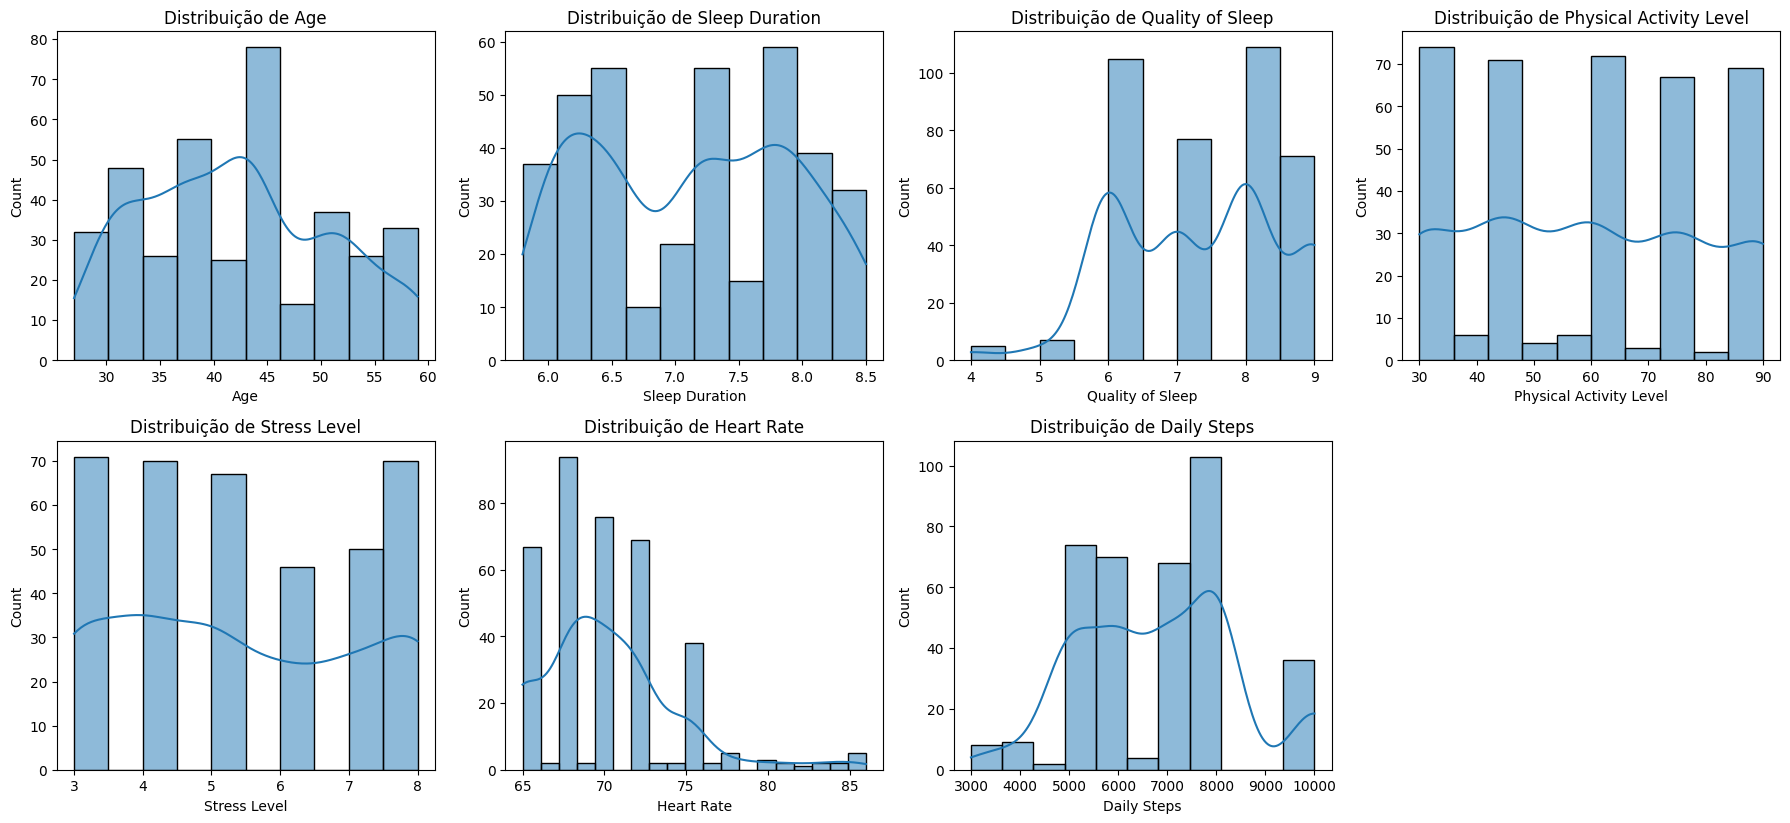

In [ ]:
# plotar o histograma das variáveis numéricas
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Boxplot das Variáveis

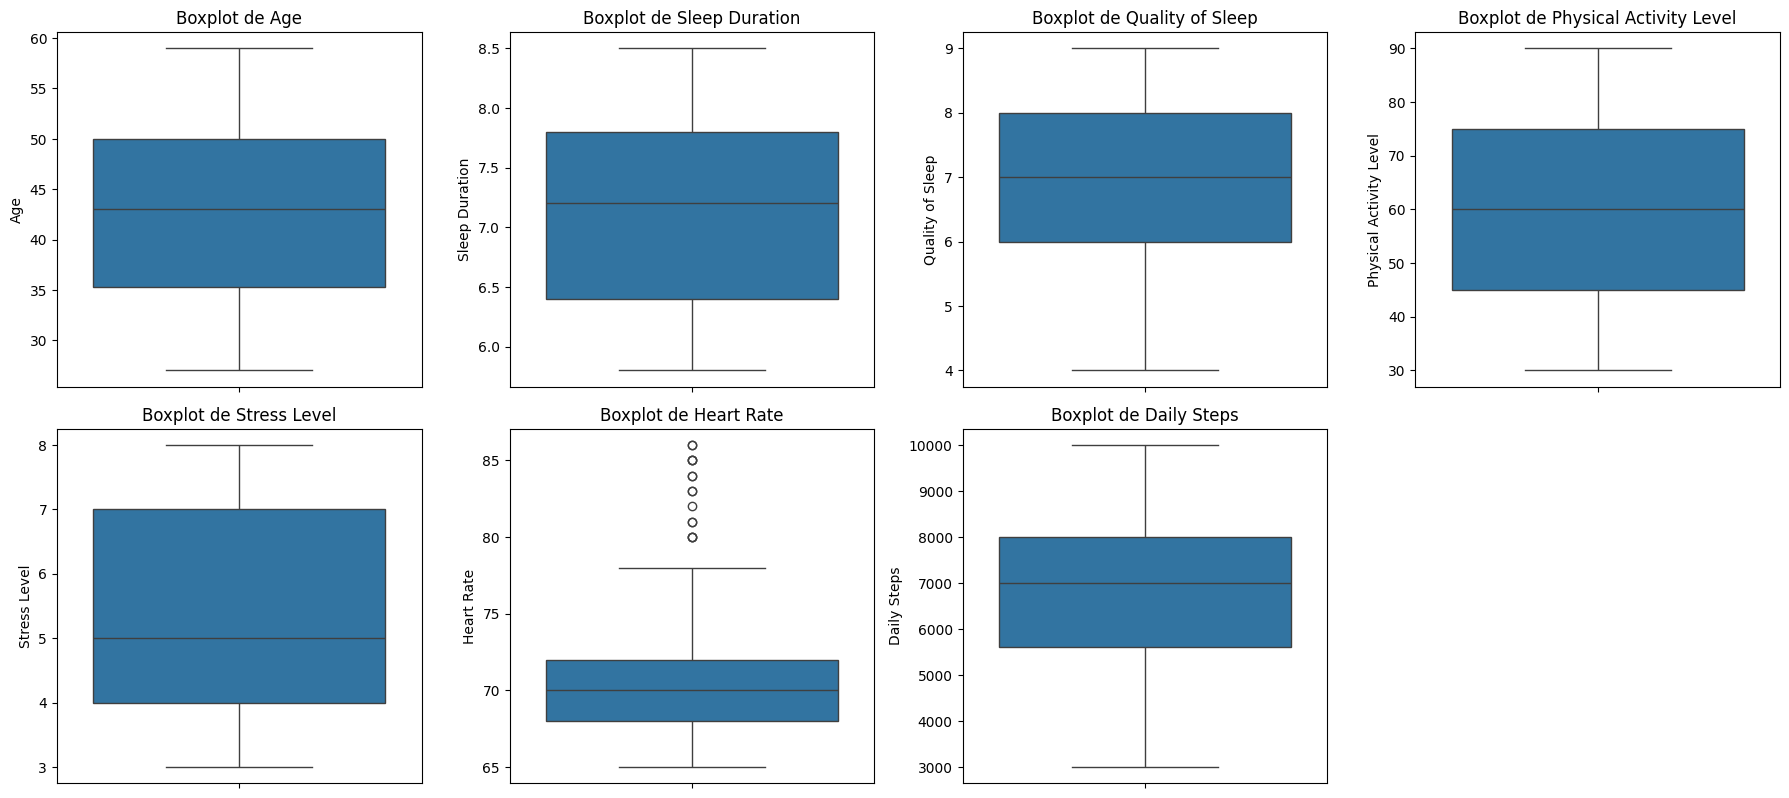

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## Indicadores de saúde cardiovascular.

# Boxplot de Frequencia cardiaca(Heart Rate)

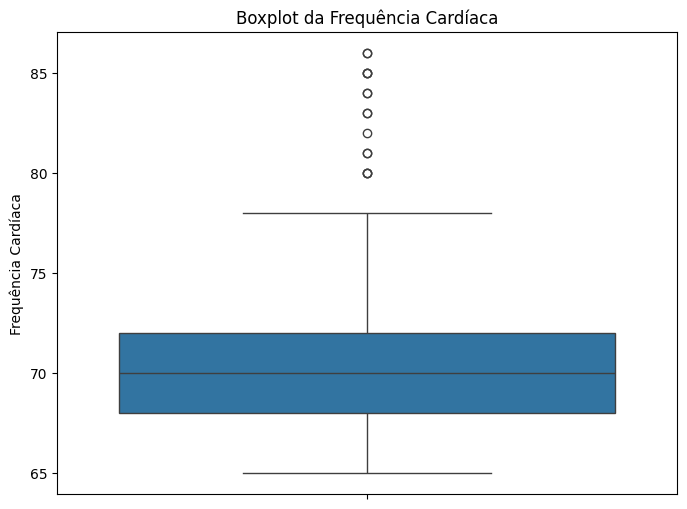

In [ ]:
# Heart Rate

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Heart Rate'])
plt.title('Boxplot da Frequência Cardíaca')
plt.ylabel('Frequência Cardíaca')
plt.show()

# Detectando Outliers da Frequencia Cardiaca (Heart Rate) -  IQR

In [ ]:
def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_heart = detectar_outliers_iqr('Heart Rate')

print(outliers_heart)

#remover outliers
#df = df.drop(outliers_insulin.index)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
5            6    Male   28     Software Engineer             5.9   
6            7    Male   29               Teacher             6.3   
16          17  Female   29                 Nurse             6.5   
18          19  Female   29                 Nurse             6.5   
80          81  Female   34             Scientist             5.8   
81          82  Female   34             Scientist             5.8   
93          94    Male   35                Lawyer             7.4   
145        146  Female   38                Lawyer             7.4   
147        148    Male   39              Engineer             6.5   
264        265    Male   48                Doctor             7.3   
266        267    Male   48                Doctor             7.3   
276        277    Male   49       

# Hipotese: Frequencia cardíaca
###"H0: A frequência cardíaca média é a mesma para pessoas com peso normal e acima do peso."
###"Ha: A frequência cardíaca média é diferente para pessoas com peso normal e acima do peso."

In [ ]:
grupo_normal = df[df['BMI Category'].isin(['Normal', 'Normal Weight'])]['Heart Rate'].dropna()
grupo_acima_peso = df[df['BMI Category'].isin(['Overweight', 'Obese'])]['Heart Rate'].dropna()

In [ ]:
print(f"  Grupo Normal (n={len(grupo_normal)}): Média={grupo_normal.mean():.2f}, Mediana={grupo_normal.median():.2f}")
print(f"  Grupo Acima do Peso (n={len(grupo_acima_peso)}): Média={grupo_acima_peso.mean():.2f}, Mediana={grupo_acima_peso.median():.2f}")

  Grupo Normal (n=216): Média=68.98, Mediana=70.00
  Grupo Acima do Peso (n=158): Média=71.79, Mediana=72.00


In [ ]:
if len(grupo_normal) > 1 and len(grupo_acima_peso) > 1:
    # Teste de Shapiro-Wilk
    shapiro_normal_w, shapiro_normal_p = stats.shapiro(grupo_normal)
    shapiro_acima_peso_w, shapiro_acima_peso_p = stats.shapiro(grupo_acima_peso)
    print(f"\nTeste de Normalidade (Shapiro-Wilk):")
    print(f"  Grupo Normal: W={shapiro_normal_w:.3f}, p={shapiro_normal_p:.3f}")
    print(f"  Grupo Acima do Peso: W={shapiro_acima_peso_w:.3f}, p={shapiro_acima_peso_p:.3f}")

    # Teste de Levene
    levene_stat, levene_p = stats.levene(grupo_normal, grupo_acima_peso)
    print(f"\nTeste de Homogeneidade de Variâncias (Levene):")
    print(f"  Estatística={levene_stat:.3f}, p={levene_p:.3f}")

    if shapiro_normal_p > 0.05 and shapiro_acima_peso_p > 0.05:
        if levene_p > 0.05:
            # Teste t de Student
            t_stat, p_value = stats.ttest_ind(grupo_normal, grupo_acima_peso, equal_var=True)
            print(f"\nTeste Comparativo: Teste t de Student (variâncias iguais)")
            print(f"  Estatística={t_stat:.3f}, p={p_value:.3f}")
        else:
            t_stat, p_value = stats.ttest_ind(grupo_normal, grupo_acima_peso, equal_var=False)
            print(f"\nTeste Comparativo: Teste t de Student (variâncias desiguais - Welch's t-test)")
            print(f"  Estatística={t_stat:.3f}, p={p_value:.3f}")
    else:
        k_stat, p_value = stats.kruskal(grupo_normal, grupo_acima_peso)
        print(f"\nTeste Comparativo: Teste de Kruskal-Wallis")
        print(f"  Estatística={k_stat:.3f}, p={p_value:.3f}")

    if p_value < 0.05:
        print("\nConclusão: Rejeitamos H0. Há uma diferença significativa na frequência cardíaca entre os grupos. (P-valor < 0.05)")

        if grupo_acima_peso.mean() > grupo_normal.mean():
            print("Observação: A frequência cardíaca média/mediana do grupo 'Acima do Peso' é maior.")
        else:
            print("Observação: A frequência cardíaca média/mediana do grupo 'Acima do Peso' é menor.")
    else:
        print("\nConclusão: Falhamos em rejeitar H0. Não há evidência de diferença significativa na frequência cardíaca entre os grupos. (P-valor >= 0.05)")
else:
    print("Dados insuficientes para realizar este teste de hipótese para BMI Category e Heart Rate.")


Teste de Normalidade (Shapiro-Wilk):
  Grupo Normal: W=0.878, p=0.000
  Grupo Acima do Peso: W=0.909, p=0.000

Teste de Homogeneidade de Variâncias (Levene):
  Estatística=41.917, p=0.000

Teste Comparativo: Teste de Kruskal-Wallis
  Estatística=33.711, p=0.000

Conclusão: Rejeitamos H0. Há uma diferença significativa na frequência cardíaca entre os grupos. (P-valor < 0.05)
Observação: A frequência cardíaca média/mediana do grupo 'Acima do Peso' é maior.


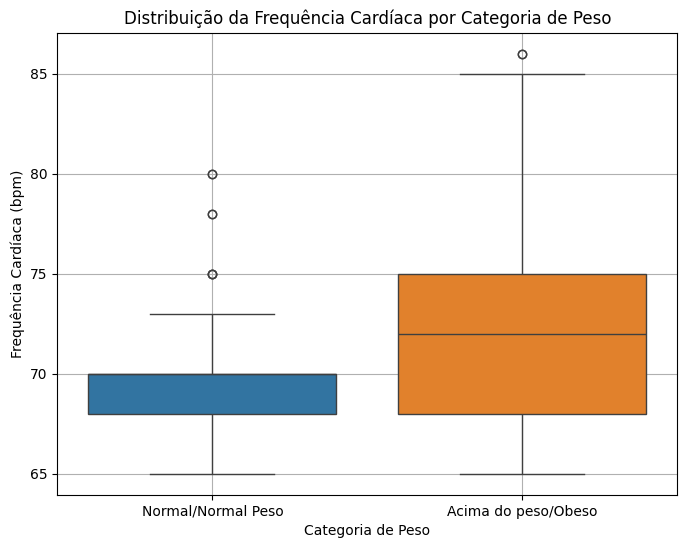

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=pd.DataFrame({'Normal/Normal Peso': grupo_normal, 'Acima do peso/Obeso': grupo_acima_peso}))
plt.title('Distribuição da Frequência Cardíaca por Categoria de Peso')
plt.xlabel('Categoria de Peso')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.grid(True)
plt.show()

##Conclusao:

Como o p-valor (0.000) é menor que o nível de significância comum (0.05), a hipótese nula (H0) é rejeitada. Isso significa que há uma diferença estatisticamente significativa na frequência cardíaca entre as pessoas com peso normal e as pessoas com peso acima do peso.
O blox pot mostra visualmente a conclusão da análise estatística de que há uma diferença significativa na frequência cardíaca entre esses dois grupos.

# Hipotese: Relacionamento de estresse e atividade física com distúrbios.
### H0: O nível de atividade física não influencia significativamente a chance de ter insônia.
### Ha: O nível de atividade física influencia significativamente a chance de ter insônia, quanto menor a atividade, maior a chance.

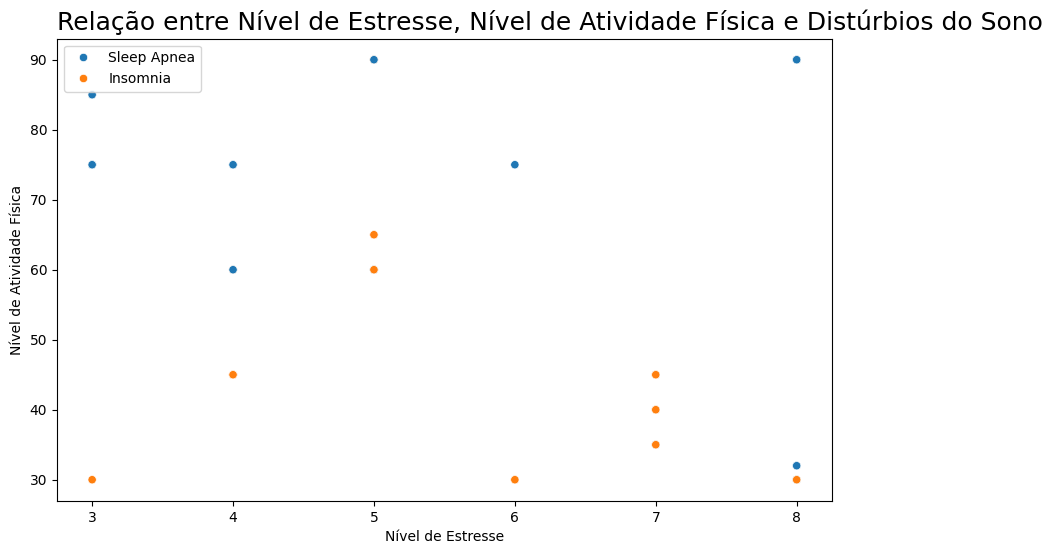

In [ ]:
# Analisando a relação entre estresse, atividade física e distúrbios do sono
df = pd.read_csv(path + '/02_sono_estilo_vida.csv', sep=',')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Stress Level', y='Physical Activity Level', hue='Sleep Disorder', legend=True)
plt.title('Relação entre Nível de Estresse, Nível de Atividade Física e Distúrbios do Sono', loc='left', fontsize=18)
plt.xlabel('Nível de Estresse')
plt.ylabel('Nível de Atividade Física')
plt.legend(loc='best')
plt.show()


Pessoas com Insonia estão concentrado em nivel de  Atividade Física mais baixo (menos de 60).

Pessoas com Apneia do sono estão concentrados em um nível de Atividade Física mais alta (mais de 60).


In [ ]:
alpha = 0.05

In [ ]:
grupo_apneia = df[df['Sleep Disorder'] == 'Sleep Apnea']['Physical Activity Level']
grupo_insonia = df[df['Sleep Disorder'] == 'Insomnia']['Physical Activity Level']
grupo_sem_disturbio = df[df['Sleep Disorder'].isna()]['Physical Activity Level']

lev_stat, lev_p = stats.levene(grupo_apneia, grupo_insonia, grupo_sem_disturbio)
print(f"Teste de Levene (homogeneidade das variâncias) - p: {lev_p:.13f}")
if lev_p > alpha:
    print("Variâncias semelhantes (Falha em rejeitar H0 de Levene)")
else:
    print("Variâncias diferentes (Rejeitar H0 de Levene)")

anova_stat, anova_p = stats.f_oneway(grupo_apneia, grupo_insonia, grupo_sem_disturbio) #grupo com + de 3
print(f"\nTeste ANOVA - p: {anova_p:.19f}")
if anova_p > alpha:
    print("Não há diferença significativa entre os grupos de distúrbio do sono (Falha em rejeitar H0)")
else:
    print("Há diferença significativa entre os grupos de distúrbio do sono (Rejeitar H0)")


Teste de Levene (homogeneidade das variâncias) - p: 0.0000000000155
Variâncias diferentes (Rejeitar H0 de Levene)

Teste ANOVA - p: 0.0000000000000000063
Há diferença significativa entre os grupos de distúrbio do sono (Rejeitar H0)


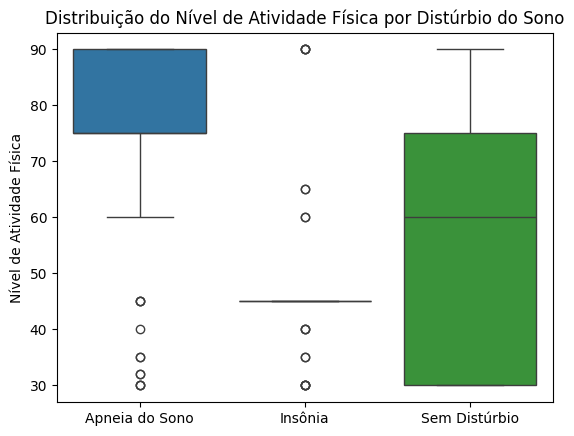

In [ ]:
sns.boxplot(data=pd.DataFrame({
    'Apneia do Sono': grupo_apneia,
    'Insônia': grupo_insonia,
    'Sem Distúrbio': grupo_sem_disturbio
}))
plt.title("Distribuição do Nível de Atividade Física por Distúrbio do Sono")
plt.ylabel("Nível de Atividade Física")
plt.show()

In [ ]:
resumo = pd.concat([
    grupo_apneia.describe(),
    grupo_insonia.describe(),
    grupo_sem_disturbio.describe()
], axis=1, keys=['Apneia do Sono', 'Insônia', 'Sem Distúrbio'])

print(resumo)

       Apneia do Sono    Insônia  Sem Distúrbio
count       78.000000  77.000000     219.000000
mean        74.794872  46.818182      57.949772
std         17.926516  11.751514      20.929814
min         30.000000  30.000000      30.000000
25%         75.000000  45.000000      30.000000
50%         75.000000  45.000000      60.000000
75%         90.000000  45.000000      75.000000
max         90.000000  90.000000      90.000000


##Conclusão
Os resultados dos testes estatísticos (ANOVA com p-valor de 0.000) e a visualização do box plot, juntamente com as estatísticas descritivas, fornecem fortes evidências para rejeitar a hipótese nula. Isso significa que o nível de atividade física influencia a presença de um distúrbio do sono, e as médias de atividade física são diferentes entre os grupos de pessoas com Apneia do Sono, Insônia e Sem Distúrbio. Pela inspeção dos dados, especialmente o grupo "Insônia" parece ter um nível de atividade física mais baixo.

# Hipotese: Idade e Duração de Sono
### H0 Não existe uma correlação linear positiva entre a idade e a duração do sono.
### Ha Existe uma correlação linear positiva entre a idade e a duração do sono.

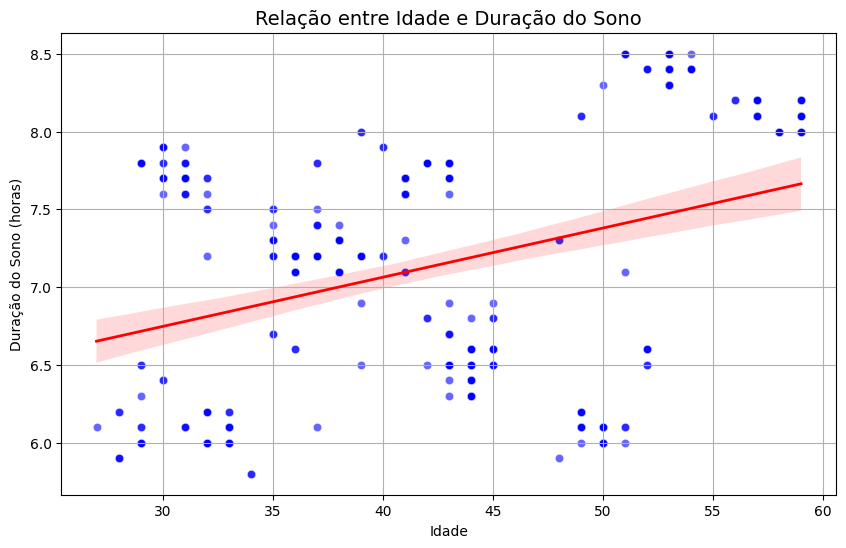

Correlação entre Idade e Duração do Sono: 0.34


In [ ]:
df = pd.read_csv(path + '/02_sono_estilo_vida.csv', sep=',')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df, color='blue', alpha=0.6)
sns.regplot(x='Age', y='Sleep Duration', data=df, scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Relação entre Idade e Duração do Sono', fontsize=14)
plt.xlabel('Idade')
plt.ylabel('Duração do Sono (horas)')
plt.grid(True)
plt.show()

correlacao = df['Age'].corr(df['Sleep Duration'])
print(f'Correlação entre Idade e Duração do Sono: {correlacao:.2f}')

In [ ]:
bins = [df['Age'].min(), 40, 50, df['Age'].max()]
labels = ['Jovens', 'Adultos', 'Velhos']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

df_jovens = df[df.Age_Group == 'Jovens']['Sleep Duration']
df_adultos = df[df.Age_Group == 'Adultos']['Sleep Duration']
df_velhos = df[df.Age_Group == 'Velhos']['Sleep Duration']

h1_lev_stats, h1_lev_p = stats.levene(df_jovens, df_adultos, df_velhos)
print(f"Levene's Test P-value: {h1_lev_p}")

if h1_lev_p > alpha:
    print("Variâncias semelhantes (Falha em rejeitar H0 de Levene)")
else:
    print("Variâncias diferentes (Rejeitar H0 de Levene)")

h1_anova_stats, h1_anova_p = stats.f_oneway(df_jovens, df_adultos, df_velhos)
print(f"\nANOVA P-value: {h1_anova_p}")

if h1_anova_p > alpha:
    print("Não há diferenças significativas na duração do sono entre os grupos de idade (Falha em rejeitar H0 de ANOVA)")
else:
    print("Existem diferenças significativas na duração do sono entre os grupos de idade (Rejeitar H0 de ANOVA)")

Levene's Test P-value: 3.674774545842244e-05
Variâncias diferentes (Rejeitar H0 de Levene)

ANOVA P-value: 1.4339812106323848e-08
Existem diferenças significativas na duração do sono entre os grupos de idade (Rejeitar H0 de ANOVA)


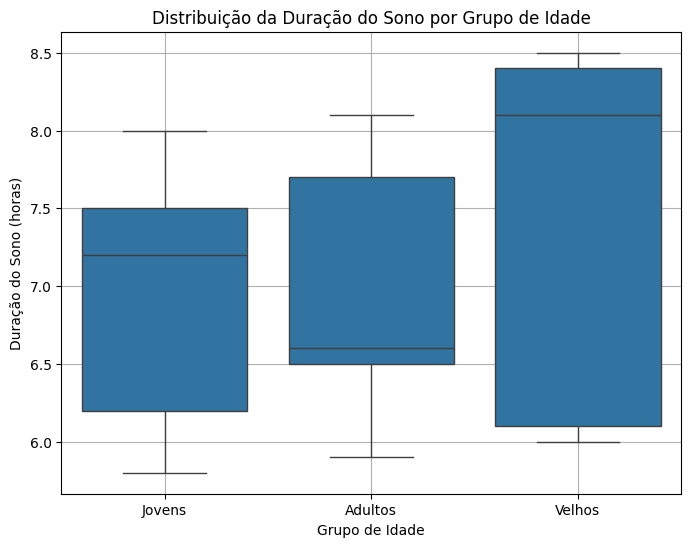

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age_Group', y='Sleep Duration', order=labels)
plt.title("Distribuição da Duração do Sono por Grupo de Idade")
plt.xlabel("Grupo de Idade")
plt.ylabel("Duração do Sono (horas)")
plt.grid(True)
plt.show()

###Conclusao

Através das análises, os dados apontam que sim, a idade tem impacto na duração do sono, sendo que pessoas com maior idade tendem a ter maior duração de sono em média.

O bloxplot nos mostra visualmente a duração media de sono dos grupos separados pelas idades. Para os mais velhos mostra uma diversidade maior nos padrões e necessidades de sono em comparação com os grupos mais jovens.

# Modelagem Preditiva

### Regressão Linear / Multipla

In [ ]:
# Dataframe com dos dados nulos removidos
df_clean = df.dropna(inplace=False)

# Select only numerical features for correlation analysis
numerical_df = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Display the correlation matrix
corr

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.981739,0.465877,0.661836,0.573090,-0.417244,-0.409011,0.447782
Age,0.981739,1.000000,0.550193,0.710221,0.604725,-0.452398,-0.373515,0.434277
Sleep Duration,0.465877,0.550193,1.000000,0.916748,0.240760,-0.848873,-0.337888,-0.194249
Quality of Sleep,0.661836,0.710221,0.916748,1.000000,0.352021,-0.872084,-0.534720,0.025166
Physical Activity Level,0.573090,0.604725,0.240760,0.352021,1.000000,-0.026627,0.101348,0.780685
Stress Level,-0.417244,-0.452398,-0.848873,-0.872084,-0.026627,1.000000,0.598860,0.285082
Heart Rate,-0.409011,-0.373515,-0.337888,-0.534720,0.101348,0.598860,1.000000,-0.133465
Daily Steps,0.447782,0.434277,-0.194249,0.025166,0.780685,0.285082,-0.133465,1.000000


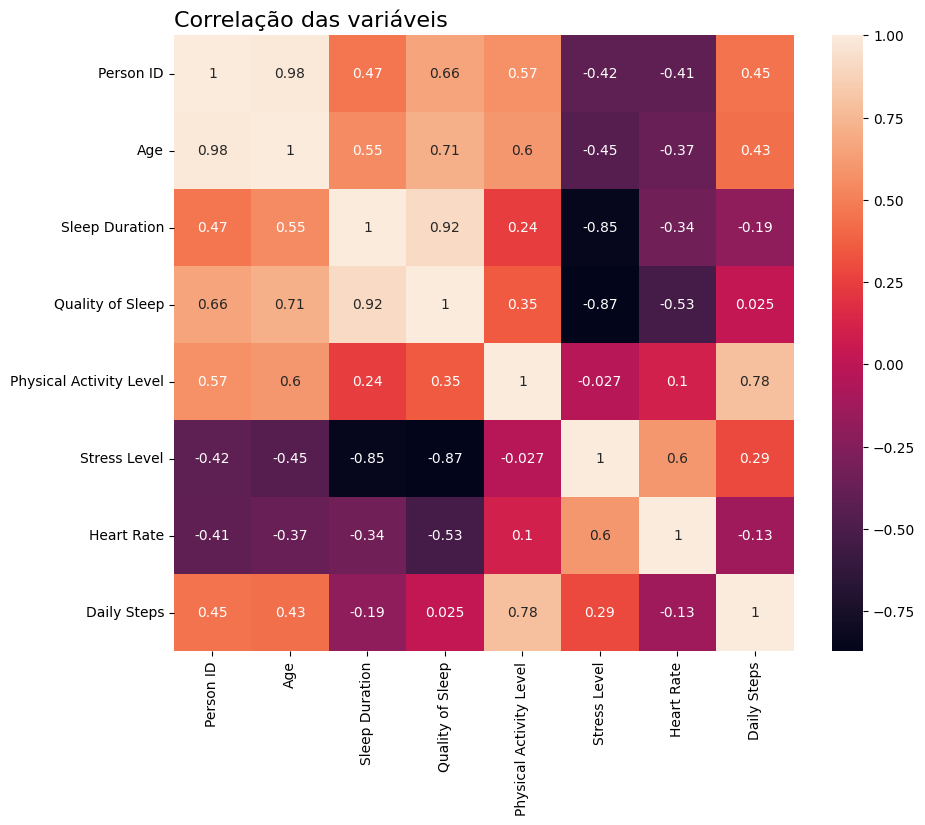

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

# Regressão Linear Simples e Multipla da Duração do Sono

In [ ]:
# Para realizar a regressão simples
X_simple = df_clean[['Age']]
y = df_clean['Sleep Duration']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [ ]:
# Para realizar a regressão múltipla
X_multi = df_clean.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder', 'Sleep Duration', 'Heart Rate'])  # remove Sleep Duration (alvo) e Heart Rate (classificação)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Regressão simples
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = sqrt(mean_squared_error(y_test_s, y_pred_s))

In [ ]:
# 4. Regressão múltipla
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
rmse_multi = sqrt(mean_squared_error(y_test_m, y_pred_m))

In [ ]:
# 5. Resultados
print(f"RMSE Regressão Simples (Idade → Duração do Sono): {rmse_simple:.2f}")
print(f"RMSE Regressão Múltipla (Todas as variáveis → Duração do sono): {rmse_multi:.2f}")

RMSE Regressão Simples (Idade → Duração do Sono): 0.70
RMSE Regressão Múltipla (Todas as variáveis → Duração do sono): 0.25


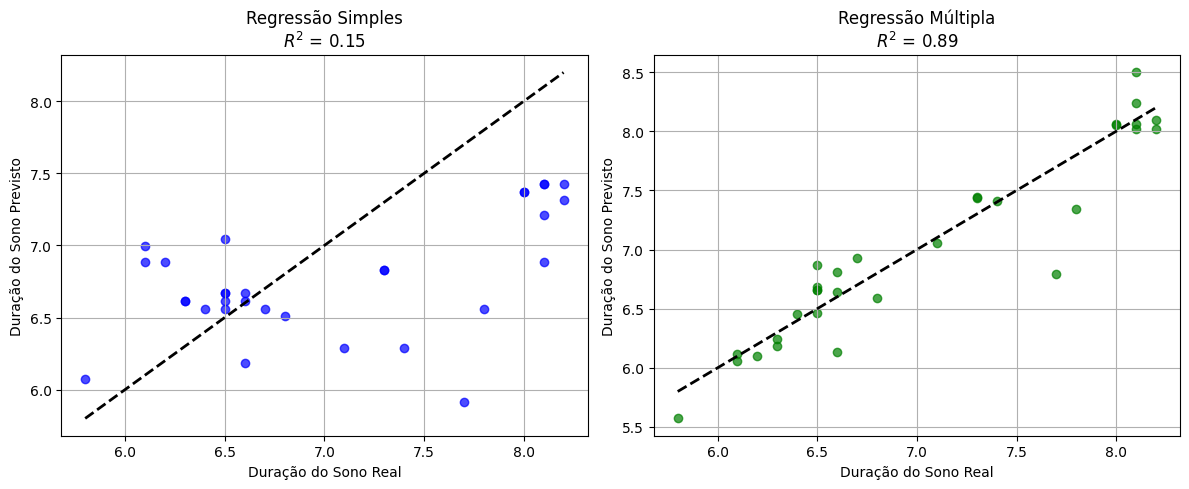

In [ ]:
# Calcular R² para ambos os modelos
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

# Gráfico: Regressão Simples
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='blue')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel('Duração do Sono Real')
plt.ylabel('Duração do Sono Previsto')
plt.title(f'Regressão Simples\n$R^2$ = {r2_simple:.2f}')
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Duração do Sono Real')
plt.ylabel('Duração do Sono Previsto')
plt.title(f'Regressão Múltipla\n$R^2$ = {r2_multi:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

O RMSE (Root Mean Squared Error) representa o erro médio das previsões do modelo em relação aos valores reais, e é medido na mesma unidade da variável prevista — neste caso, Duração do Sono (horas).

Um RMSE de 0.96 na regressão simples significa que, em média, as previsões do modelo erram por cerca de 0.70 em horas.

considerando as horas de sono que variam entre 6h e 8h e um RMSE de 0.70 indica um erro relativamente alto indicando que o modelo tem baixa precisão na nota de Duração do Sono

A regressão múltipla, com RMSE de 0.25, teve desempenho ligeiramente melhor, sugerindo que as variáveis adicionais contribuíram significativamente para melhorar a predição.

Nos gráficos também é possivel observar que na regressão Simples os dados estão mais dispersos, já na regressão Multipla os dados tendem a uma distribuição normal.

# Conclusão

Em primeiro contato com os dados vemos que há uma grande quantidade de informações faltantes, isso é muito importante saber, pois mostra a quantidade de pessoas que não responderam, ou seja, não tem nenhum tipo de problema com o sono e não fez sentido para eles fazer essa pesquisa.

Através da análise podemos perceber que a Atividade Física pode ajudar pessoas que têm transtornos de sono como a Insônia, a prevenir esse tipo de problema
Em particular, pessoas com insônia tendem a apresentar níveis de atividade física mais baixos, sugerindo uma correlação entre maior atividade física e uma menor prevalência desses problemas de sono. No entanto, é importante ressaltar que esta análise indica uma associação, e não uma relação.

Pessoas com uma pressão arterial normal tende a ter um peso normal também, em contrapartida, pessoas que estão acima do peso tendem a ter uma pressão arterial mais elevada e se distancia da média. Esta observação sugere que manter um peso corporal saudável está associado a frequências cardíacas mais próximas da média geral da população, reforçando a importância do gerenciamento do peso para a saúde cardiovascular.

Podemos ver que apesar de observar que a idade aumenta a duração do sono do indivíduo, através de testes de regressão linear simples e múltiplo, a correlação desses dados contém um erro de precisão relativamente alto para observarmos a duração de sono.

Em síntese, os dados apontam para relações importantes entre hábitos de vida (atividade física e peso) e indicadores de saúde (qualidade do sono e frequência cardíaca), destacando áreas potenciais para intervenções.